In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import sys
from copy import copy
import time
from datetime import datetime, timedelta
from collections import OrderedDict
import analysis_utils as utils
from sklearn.linear_model import LinearRegression

In [187]:
# for now, data is in C:\bonsai\data\Quentin and analysis script is in C:\Users\qpmoric\Desktop\gd_analysis

In [223]:
# find folder with files for one mouse and add a 'Session' column
path, dirs, files = next(os.walk('C://bonsai//data//Quentin//QP01//TrialData'))
all_files = glob.glob(path + "/*.csv")

li = []
s = 0
while s < len(files):
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        df.insert(0, 'Session', s)
        li.append(df)
        s+=1   

data_qpo1 = pd.concat(li, axis=0, ignore_index=True)
data_qpo1['Mouse'] = 'QPO1' # add column with mouse name

In [224]:
# add a correct, incorrect & violation column
data_qpo1['Correct'] = np.where(data_qpo1.Trial_Outcome == 1, 1, 0)
data_qpo1['Incorrect'] = np.where(data_qpo1.Trial_Outcome == 0, 1, 0)
data_qpo1['Violation'] = np.where(data_qpo1.Trial_Outcome == -1, 1, 0)


In [225]:
# remove sessions with less than 30 trials
n = 30
df = []

for session in data_qpo1.Session.unique():
    if len(data_qpo1[data_qpo1.Session == session]) > n:
        df.append(data_qpo1[data_qpo1.Session == session])
data_qpo1 = pd.concat(df, ignore_index=True)

<AxesSubplot:xlabel='Session', ylabel='Stim1_Duration'>

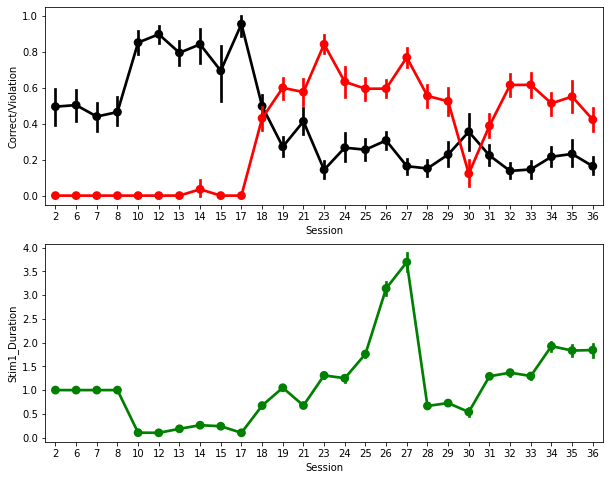

In [226]:
figure(figsize=(10, 8))
plt.subplot(2,1,1)
sns.pointplot(data = data_qpo1, x = 'Session', y = 'Correct', color = 'k')
#sns.pointplot(data = data_qpo1, x = 'Session', y = 'Incorrect', color = 'g')
sns.pointplot(data = data_qpo1, x = 'Session', y = 'Violation', color = 'r')
plt.ylabel('Correct/Violation')
plt.subplot(2,1,2)
sns.pointplot(data = data_qpo1, x = 'Session', y = 'Stim1_Duration', color = 'g')


In [9]:
data_qpo1

,Session,Time,Trial_Outcome,Stim1_Duration,Stim1_Amplitude,Stim2_Amplitude,GoTone_Amplitude,RewardedSide,RewardAttempts,Tone_Duration,Trial_Start,Trial_End,GoToneTime,InterTrial_Duration,RewardTone_Time,InterStim_Interval,Reward_Amount,Withdraw_WaitTime,WarmUp,RewardLED_Duration,Response_Window,Mouse,Correct,Incorrect,Violation
0,2,13:10:03.7045760,1,1.000,80,80,80,2,3,0.25,13:10:01.7268352,13:10:02.6603648,13:10:01.7958016,0.5,13:10:02.6458752,00:00:00.2500000,10.0,0.5,True,0,60,QPO1,1,0,0
1,2,13:10:20.3587840,1,1.000,80,80,80,2,3,0.25,13:10:08.7359360,13:10:19.3315584,13:10:08.7385088,0.5,13:10:19.3308032,00:00:00.2500000,10.0,0.5,True,0,60,QPO1,1,0,0
2,2,13:10:23.6326144,1,1.000,80,80,80,2,3,0.25,13:10:21.7382656,13:10:22.6180096,13:10:21.7409152,0.5,13:10:22.6013952,00:00:00.2500000,10.0,0.5,True,0,60,QPO1,1,0,0
3,2,13:11:28.5213184,0,1.000,80,80,80,1,3,0.25,13:10:28.4943872,13:11:28.5204352,13:10:28.4977536,0.5,00:00:00,00:00:00.2500000,10.0,0.5,True,0,60,QPO1,0,1,0
4,2,13:11:58.4365952,1,1.000,80,80,80,1,3,0.25,13:11:55.2493056,13:11:57.4024704,13:11:55.2516480,0.5,13:11:57.4017280,00:00:00.2500000,10.0,0.5,True,0,60,QPO1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,29,11:24:59.4904704,0,0.918,80,80,80,1,1,0.25,11:24:57.3298048,11:24:58.4782592,11:24:58.2634496,0.5,00:00:00,00:00:00.2500000,5.0,0.1,False,0,10,QPO1,0,1,0
3405,29,11:25:12.4147456,-1,0.918,80,80,80,1,1,0.25,11:25:09.0260096,11:25:09.8991872,00:00:00,0.5,00:00:00,00:00:00.2500000,5.0,0.1,False,0,10,QPO1,0,0,1
3406,29,11:25:26.1652480,-1,0.918,80,80,80,1,1,0.25,11:25:22.7560576,11:25:23.6514176,00:00:00,0.5,00:00:00,00:00:00.2500000,5.0,0.1,False,0,10,QPO1,0,0,1
3407,29,11:25:36.1066752,-1,0.918,80,80,80,1,1,0.25,11:25:33.1365760,11:25:33.6047104,00:00:00,0.5,00:00:00,00:00:00.2500000,5.0,0.1,False,0,10,QPO1,0,0,1
